<a href="https://colab.research.google.com/github/esragcetnky/Edureka-LSTM/blob/main/Edureka_%7C_LSTM_Explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.What is NLP?

* concerned with the interactions between computers and human language
* how to program computers to process and analyze large amounts of natural language data

# 2.Ways to Process Text Data

*  1.machine learning
* 2.deep learning
      LSTM
      Neural Network
      RNN
      Transfer network


# 3.Recurrent Neural Network

* designed to recognize a data's sequential characteristics and use patterns to predict the next likely scenario
* sequential data : 
* states
* X : inputs 
      X=[URI, IS, A, REALLY, GOOD, MOVIE]
* y : training values
* y̅ : predicted values
* a : 
      a[0]= URI
      a[1]:= URI IS
      .
      .
      .
      a[N]= URI IS A REALLY GOOD MOVIE
* u : is equal for everyone
* w : weights
* v
* activation function :tanh
      a<t>  = tanh ( (X * u) + (a * w) )
      y<t> = sigmoid ( ( a<t> * v ) + bias ) or softmax ( ( a<t> * v ) + bias )
      loss = np.sum((y̅ - y)*theta)
* embedding layer
      embedding matrix
      which is like filters or kernels in cnn
      it is helps to reduce size
![](https://drive.google.com/uc?export=view&id=17FfSgboFdXUFz4H65NW3ixRm8kVQ4Iw6)

# 4.LSTM

 * vanishing gradient problemi için çözüm getiriyor.
 * lstm rnnlerin hidden layerlarına yapılan modifikasyonla oluşturulmuştur.
 * vanishing gradient problem : weightleri güncellemek için kullanılan gradientlar çok derin sinir ağlarında zamanla gradientler kaybolur (vanishes) bundan dolayı ağ weightleri güncelleyemez hatta bazen ağ tamamen çalışamaz hale gelir
 * lstm has feedback connections.It can not only process single data points, but also entire sequences of data.
 * lstm bu sorunları çözmek için 3 gate kullanır
        1. forget gate : cell state'inde daha fazla gerekli olmayan bilgileri siler.
        2. input gate :  cell state'ine eklenecek gerekli yeni bilgiler input gate sayesinde yüklenir.
        3. output gate : cell state'ine eklenecek gerekli yeni bilgiler aynı zamanda output gate sayesinde yüklenebilir.

![](https://drive.google.com/uc?export=view&id=1glo-eAOhIovNgauQ5IozknbUG9cZZEzj)

# 5.Implementing LSTM

## 5.1 Mount Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 5.2 Download Dataset 
* Dataset is from Kaggle and it is called US baby names
* So i will use kaggle api to download *dataset*

*Kaggle api dosyasına bağlanma*

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

*Gerekli klasörün içine girme*

In [ ]:
pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/'Tasarım Süreçleri'/'Colab Notebooks'

/content/drive/MyDrive/Tasarım Süreçleri/Colab Notebooks


In [ ]:
pwd

'/content/drive/MyDrive/Tasarım Süreçleri/Colab Notebooks'

*Veri setinin yer alacağı bir klasör oluşturma*

In [ ]:
!mkdir dataset

*Klasörün içine girme*

In [ ]:
cd dataset

/content/drive/MyDrive/Tasarım Süreçleri/Colab Notebooks/dataset


*Kaggle api'ni kullanarak veri setini indirme*

In [ ]:
!kaggle datasets download -d kaggle/us-baby-names

 94% 163M/173M [00:01<00:00, 133MB/s]
100% 173M/173M [00:01<00:00, 143MB/s]


*Dataset zip dosyası içinde gelir onu unzipleyip zip dosyasını silme*

In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  us-baby-names.zip
  inflating: NationalNames.csv       
  inflating: NationalReadMe.pdf      
  inflating: StateNames.csv          
  inflating: StateReadMe.pdf         
  inflating: database.sqlite         
  inflating: hashes.txt              


In [ ]:
!ls

database.sqlite  NationalNames.csv   StateNames.csv
hashes.txt	 NationalReadMe.pdf  StateReadMe.pdf


In [ ]:
pwd

'/content/drive/My Drive/Tasarım Süreçleri/Colab Notebooks/dataset'

In [ ]:
cd Colab\ Notebooks

/content/drive/My Drive/Tasarım Süreçleri/Colab Notebooks


## 5.3 Import Libraries & Dataset

*Import libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*Import dataset*

In [ ]:
data=pd.read_csv("./dataset/NationalNames.csv")

## 5.4 Analyze Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 69.6+ MB


In [ ]:
data.shape

(1825433, 5)

In [ ]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


## 5.5 Preprocessing Data

*Label encoder for gender column*

In [ ]:
data['Gender']=data['Gender'].astype('category').cat.codes

In [ ]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,0,7065
1,2,Anna,1880,0,2604
2,3,Emma,1880,0,2003
3,4,Elizabeth,1880,0,1939
4,5,Minnie,1880,0,1746


*We only need unique names*

In [ ]:
df= data.groupby('Name').mean()['Gender'].reset_index()

In [ ]:
df.shape

(93889, 2)

In [ ]:
df.head()

,Name,Gender
0,Aaban,1.0
1,Aabha,0.0
2,Aabid,1.0
3,Aabriella,0.0
4,Aadam,1.0


*Making gender's type int*

In [ ]:
df['Gender']=df['Gender'].astype('int')

In [ ]:
df.head()

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1


In [ ]:
import string

*We need a list of alphabets to convert words to number*

In [ ]:
letters=list(string.ascii_lowercase)
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

*We can use vocab to encode letters to numbers*

In [ ]:
vocab=dict(zip(letters,range(1,27)))
vocab

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

*We can use r_vocab to decode words*

In [ ]:
r_vocab=dict(zip(range(1,27),letters))
r_vocab

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

*This function will return every letter in name column to number and save the result to dataframe*

In [ ]:
def word_to_number():
  for i  in range(0,df.shape[0]):
    seq=[ vocab[letters.lower()] for letters in df['Name'][i]]
    df['Name'][i]=seq

In [ ]:
# to convert our names to list of equivalent numbers
word_to_number()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


*Let's see how our dataframe looks like after encoding*

In [ ]:
df.head()

,Name,Gender
0,"[1, 1, 2, 1, 14]",1
1,"[1, 1, 2, 8, 1]",0
2,"[1, 1, 2, 9, 4]",1
3,"[1, 1, 2, 18, 9, 5, 12, 12, 1]",0
4,"[1, 1, 4, 1, 13]",1


*We need to determine the number of boxes in lstm. We will send each letter to one box, hence the number of letters has an impact on the number of boxes. If we use the maximum number of letters in a name then there will be lots of zeros which will bring loss and our accuracy is going to drop.*

*We can look histogrom of name length then we can decide the best number for boxes*

In [ ]:
X=df['Name'].values
Y=df['Gender'].values

In [ ]:
name_length=[len(X[i]) for i in range (0, df.shape[0])]

In [ ]:
len(name_length)

93889

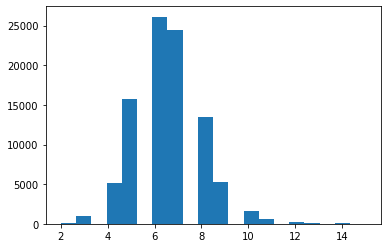

In [ ]:
plt.hist(name_length,bins=20)
plt.show()

*We decided to have 10 boxes so next step we need to convert each names to 10 digit row*

In [ ]:
from keras.preprocessing.sequence import pad_sequences
x=pad_sequences(df['Name'].values,
                maxlen=10,
                padding='pre')

In [ ]:
x

array([[ 0,  0,  0, ...,  2,  1, 14],
       [ 0,  0,  0, ...,  2,  8,  1],
       [ 0,  0,  0, ...,  2,  9,  4],
       ...,
       [ 0,  0,  0, ..., 14, 14,  1],
       [ 0,  0,  0, ..., 25, 15, 14],
       [ 0,  0,  0, ..., 25, 26, 24]], dtype=int32)

In [ ]:
x.shape

(93889, 10)

## 5.6 Creating Model

In [ ]:
from keras.layers import Input,Embedding,Dense,LSTM
from keras.models import Model

In [ ]:
vocab_size=len(vocab)+1
vocab_size

27

In [ ]:
# input layer
inp=Input(shape=(10,))
# embedding layer 
emn=Embedding(input_dim=vocab_size,
              output_dim =5 )(inp)
# lstm layers
lstm1=LSTM(units=32,
           return_sequences=True)(emn)
lstm2=LSTM(units=64)(lstm1)

out=Dense(units=1,
          activation='sigmoid')(lstm2)

my_model=Model(inputs=inp,
               outputs=out)

In [ ]:
my_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 10, 5)             135       
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 32)            4864      
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 29,896
Trainable params: 29,896
Non-trainable params: 0
_________________________________________________________________


## 5.7 Compile & Train Model

In [ ]:
my_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
his=my_model.fit(x,Y,epochs=10, batch_size=256,validation_split=0.2)

Epoch 1/10
294/294 [==============================] - 14s 37ms/step - loss: 0.6071 - acc: 0.6919 - val_loss: 0.4121 - val_acc: 0.8125
Epoch 2/10
294/294 [==============================] - 10s 34ms/step - loss: 0.4155 - acc: 0.8065 - val_loss: 0.3880 - val_acc: 0.8217
Epoch 3/10
294/294 [==============================] - 10s 34ms/step - loss: 0.3930 - acc: 0.8137 - val_loss: 0.3869 - val_acc: 0.8221
Epoch 4/10
294/294 [==============================] - 10s 34ms/step - loss: 0.3897 - acc: 0.8154 - val_loss: 0.3844 - val_acc: 0.8263
Epoch 5/10
294/294 [==============================] - 10s 34ms/step - loss: 0.3877 - acc: 0.8183 - val_loss: 0.3823 - val_acc: 0.8237
Epoch 6/10
294/294 [==============================] - 10s 34ms/step - loss: 0.3844 - acc: 0.8186 - val_loss: 0.3811 - val_acc: 0.8221
Epoch 7/10
294/294 [==============================] - 10s 34ms/step - loss: 0.3799 - acc: 0.8220 - val_loss: 0.3774 - val_acc: 0.8288
Epoch 8/10
294/294 [==============================] - 10s 34ms

## 5.8 Visualize Result

In [ ]:
plt.style.use('seaborn-darkgrid')

*Accuracy and Validation Accuracy*

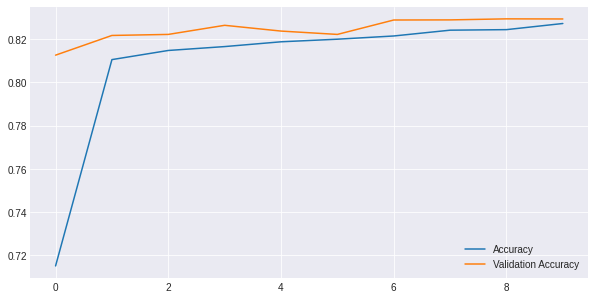

In [ ]:
fig, ax=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
ax.plot(his.history['acc'],label='Accuracy')
ax.plot(his.history['val_acc'],label='Validation Accuracy')
ax.legend()
fig.show()

*Loss and Validation Loss*

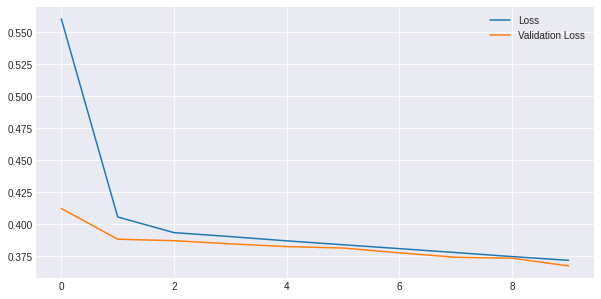

In [ ]:
fig, ax=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
ax.plot(his.history['loss'],label='Loss')
ax.plot(his.history['val_loss'],label='Validation Loss')
ax.legend()
fig.show()

## 5.9 Predict for Random Name

In [ ]:
def predict_name(name):
  test_name=name.lower()
  seq=[vocab[i] for i in test_name]
  x_test=pad_sequences([seq],10)
  y_pred=my_model.predict(x_test)
  if y_pred < 0.5:
    print("Name is female...")
  else:
    print("Name is male...")

In [ ]:
predict_name('Ugur')

Name is male...


In [ ]:
predict_name('Ayse')

Name is female...


In [ ]:
predict_name('Mustafa')

Name is female...


In [ ]:
predict_name('Natasha')

Name is female...


# 6.LSTM Use Cases
* name entity recognition
* sentiment analysis
* machine translation
